In [127]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split

In [282]:
sensor_data = pd.read_csv("D:\\p_eaglesense\\eaglesense\\data\\topviewkinect\\3032\\android_sensor_data.csv")

In [283]:
sensor_data.head()

,frame_id,depth_time,addr,time,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,...,linear_accel_x,linear_accel_y,linear_accel_z,gravity_x,gravity_y,gravity_z,rotation_x,rotation_y,rotation_z,label
0,0,0,10.32.114.115:48670,0.00000,-0.162,0.097,9.670,0.000,30639613351673244813872857088.00000,0.000,...,0.0,0.0,0.0,-0.000,0.000,157715529759544155377238016.00000,0.000,157730729876660892047769600.00000,0.000,0
1,0,0,10.32.114.115:48670,0.00476,-0.162,0.097,9.670,0.000,30639613351673244813872857088.00000,0.000,...,0.0,0.0,0.0,-0.000,0.000,157715529759544155377238016.00000,0.000,157730729876660892047769600.00000,0.000,0
2,0,0,10.32.114.115:48670,0.00952,-0.162,0.097,9.670,0.003,0.00000,-0.000,...,0.0,0.0,0.0,-0.000,0.000,157715529759544155377238016.00000,0.000,157730729876660892047769600.00000,0.000,0
3,0,0,10.32.114.115:48670,0.01428,-0.109,0.160,9.710,0.000,-0.00100,-0.000,...,-0.0,-0.0,-0.0,-0.164,0.099,9.80500,-0.003,0.00900,0.766,0
4,0,0,10.32.114.115:48670,0.01907,-0.106,0.131,9.746,-0.001,0.00100,-0.001,...,-0.0,-0.0,-0.0,-0.164,0.099,9.80500,-0.003,0.00900,0.766,0


In [284]:
# sensor_data["linear_accel_y"] = sensor_data["linear_accel_y"].apply(pd.to_numeric)

In [285]:
# sensor_data.loc[(sensor_data['linear_accel_x'] >= -0.05) & (sensor_data['linear_accel_x'] <= 0.05), "linear_accel_x"] = 0
# sensor_data.loc[(sensor_data['linear_accel_y'] >= -0.05) & (sensor_data['linear_accel_y'] <= 0.05), "linear_accel_y"] = 0
# sensor_data.loc[(sensor_data['linear_accel_z'] >= -0.05) & (sensor_data['linear_accel_z'] <= 0.05), "linear_accel_z"] = 0

In [286]:
sensor_data.head()

,frame_id,depth_time,addr,time,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,...,linear_accel_x,linear_accel_y,linear_accel_z,gravity_x,gravity_y,gravity_z,rotation_x,rotation_y,rotation_z,label
0,0,0,10.32.114.115:48670,0.00000,-0.162,0.097,9.670,0.000,30639613351673244813872857088.00000,0.000,...,0.0,0.0,0.0,-0.000,0.000,157715529759544155377238016.00000,0.000,157730729876660892047769600.00000,0.000,0
1,0,0,10.32.114.115:48670,0.00476,-0.162,0.097,9.670,0.000,30639613351673244813872857088.00000,0.000,...,0.0,0.0,0.0,-0.000,0.000,157715529759544155377238016.00000,0.000,157730729876660892047769600.00000,0.000,0
2,0,0,10.32.114.115:48670,0.00952,-0.162,0.097,9.670,0.003,0.00000,-0.000,...,0.0,0.0,0.0,-0.000,0.000,157715529759544155377238016.00000,0.000,157730729876660892047769600.00000,0.000,0
3,0,0,10.32.114.115:48670,0.01428,-0.109,0.160,9.710,0.000,-0.00100,-0.000,...,-0.0,-0.0,-0.0,-0.164,0.099,9.80500,-0.003,0.00900,0.766,0
4,0,0,10.32.114.115:48670,0.01907,-0.106,0.131,9.746,-0.001,0.00100,-0.001,...,-0.0,-0.0,-0.0,-0.164,0.099,9.80500,-0.003,0.00900,0.766,0


Text(0.5,1,'linear accel Z')

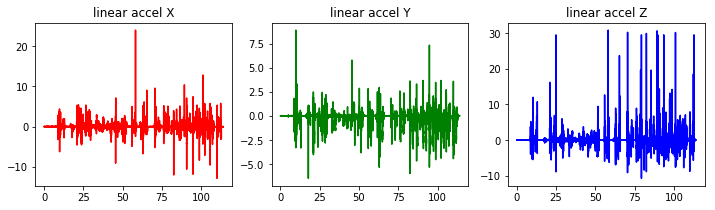

In [287]:
f = plt.figure(figsize=(12,3))

linear_accel_x_ax = f.add_subplot(131)
linear_accel_x_ax.plot(sensor_data["time"], sensor_data["linear_accel_x"], 'r')
plt.title('linear accel X')

linear_accel_y_ax = f.add_subplot(132)
linear_accel_y_ax.plot(sensor_data["time"], sensor_data["linear_accel_y"], 'g')
plt.title('linear accel Y')

linear_accel_z_ax = f.add_subplot(133)
linear_accel_z_ax.plot(sensor_data["time"], sensor_data["linear_accel_z"], 'b')
plt.title('linear accel Z')

In [288]:
# fft



In [289]:
pd.unique(sensor_data["label"])

array([0, 1], dtype=int64)

In [290]:
bring_device_indices = sensor_data.index[sensor_data["label"] == 1].tolist()

In [291]:
bring_device_indices[:10]

[1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770]

In [292]:
len(bring_device_indices)

7179

In [293]:
others_indices = sensor_data.index[sensor_data["label"] == 0].tolist()

In [294]:
others_indices[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [295]:
len(others_indices)

16716

In [296]:
# find bring-device positive samples
bring_device_gesture_list = []

start_idx = bring_device_indices[0]
end_idx = bring_device_indices[0]

for element_idx, frame_idx in enumerate(bring_device_indices[1:]):

    # if the gesture is continuing, update end_idx
    if end_idx + 1 == frame_idx:
        end_idx = frame_idx
        if element_idx < len(bring_device_indices)-2:
            continue

    # append gesture sample to list
    if start_idx != end_idx:
        print("append: ", (start_idx, end_idx))
        bring_device_gesture_list.append((start_idx, end_idx))
        start_idx = frame_idx
        end_idx = frame_idx

append:  (1761, 2408)
append:  (4315, 4842)
append:  (6746, 7149)
append:  (8220, 8663)
append:  (9315, 9694)
append:  (10216, 10660)
append:  (11625, 12022)
append:  (13128, 13487)
append:  (14736, 15155)
append:  (15916, 16295)
append:  (17203, 17573)
append:  (18212, 18490)
append:  (18926, 19337)
append:  (19795, 20167)
append:  (20614, 20966)
append:  (21360, 21687)
append:  (22058, 22365)
append:  (23008, 23355)


In [297]:
len(bring_device_gesture_list)

18

In [298]:
# find gesture samples length
bring_device_gesture_duration_list = []

for start_idx, end_idx in bring_device_gesture_list:
    bring_device_gesture_duration_list.append(end_idx - start_idx)

In [299]:
min(bring_device_gesture_duration_list)

278

In [300]:
max(bring_device_gesture_duration_list)

647

In [301]:
# find bring-device negative samples
bring_device_non_gesture_list = []

start_idx = others_indices[0]
end_idx = others_indices[0]

for element_idx, frame_idx in enumerate(others_indices[1:]):

    # if the non-gesture is continuing, update end_idx
    if end_idx + 1 == frame_idx:
        end_idx = frame_idx
        if element_idx < len(others_indices)-2:
            continue

    # append non-gesture sample to list
    if start_idx != end_idx:
        print("append: ", (start_idx, end_idx))
        bring_device_non_gesture_list.append((start_idx, end_idx))
        start_idx = frame_idx
        end_idx = frame_idx

append:  (0, 1760)
append:  (2409, 4314)
append:  (4843, 6745)
append:  (7150, 8219)
append:  (8664, 9314)
append:  (9695, 10215)
append:  (10661, 11624)
append:  (12023, 13127)
append:  (13488, 14735)
append:  (15156, 15915)
append:  (16296, 17202)
append:  (17574, 18211)
append:  (18491, 18925)
append:  (19338, 19794)
append:  (20168, 20613)
append:  (20967, 21359)
append:  (21688, 22057)
append:  (22366, 23007)
append:  (23356, 23894)


In [302]:
window_size = 200 # 200Hz

In [303]:
acceleromter_features = ["linear_accel_x", "linear_accel_y", "linear_accel_z"]

In [304]:
# linear acceleration 3D * win_size
column_size = 3 * window_size

In [305]:
column_size

600

In [306]:
# +1 (label)
columns_X = list(range(column_size))
columns_y = ["label"]
columns_all = list(columns_X)
columns_all.extend(columns_y)

In [307]:
sensor_data_chunks = pd.DataFrame(columns=columns_all)

In [308]:
# append bring-device positive samples

bring_device_positive_samples_list = []

for start_idx, end_idx in bring_device_gesture_list:
    # sample start and end indices
    sample_start_idx = start_idx
    sample_end_idx = start_idx + window_size
    
    while(sample_end_idx <= end_idx):
        # get samples within one window
        bring_device_samples = sensor_data.iloc[list(range(sample_start_idx, sample_end_idx))]
        bring_device_samples = bring_device_samples[acceleromter_features]
        
        bring_device_positive_samples_list.append(bring_device_samples)
        
        # concatenate multiple samples into one sample
        bring_device_sample_window = pd.DataFrame(bring_device_samples.values.reshape(1, -1))
        bring_device_sample_window["label"] = 1
        
        # append to dataframe
        sensor_data_chunks = sensor_data_chunks.append(bring_device_sample_window, ignore_index=True)
        
        # next sample
        sample_start_idx = sample_end_idx
        sample_end_idx = sample_start_idx + window_size

In [309]:
len(bring_device_positive_samples_list)

26

In [310]:
bring_device_positive_1 = bring_device_positive_samples_list[0]
bring_device_positive_2 = bring_device_positive_samples_list[1]
bring_device_positive_3 = bring_device_positive_samples_list[2]
bring_device_positive_4 = bring_device_positive_samples_list[3]
bring_device_positive_5 = bring_device_positive_samples_list[4]

In [311]:
bring_device_positive_1.reset_index(inplace=True)
bring_device_positive_2.reset_index(inplace=True)
bring_device_positive_3.reset_index(inplace=True)
bring_device_positive_4.reset_index(inplace=True)
bring_device_positive_5.reset_index(inplace=True)

In [312]:
bring_device_positive_1["time"] = bring_device_positive_1.index
bring_device_positive_2["time"] = bring_device_positive_2.index
bring_device_positive_3["time"] = bring_device_positive_3.index
bring_device_positive_4["time"] = bring_device_positive_4.index
bring_device_positive_5["time"] = bring_device_positive_5.index

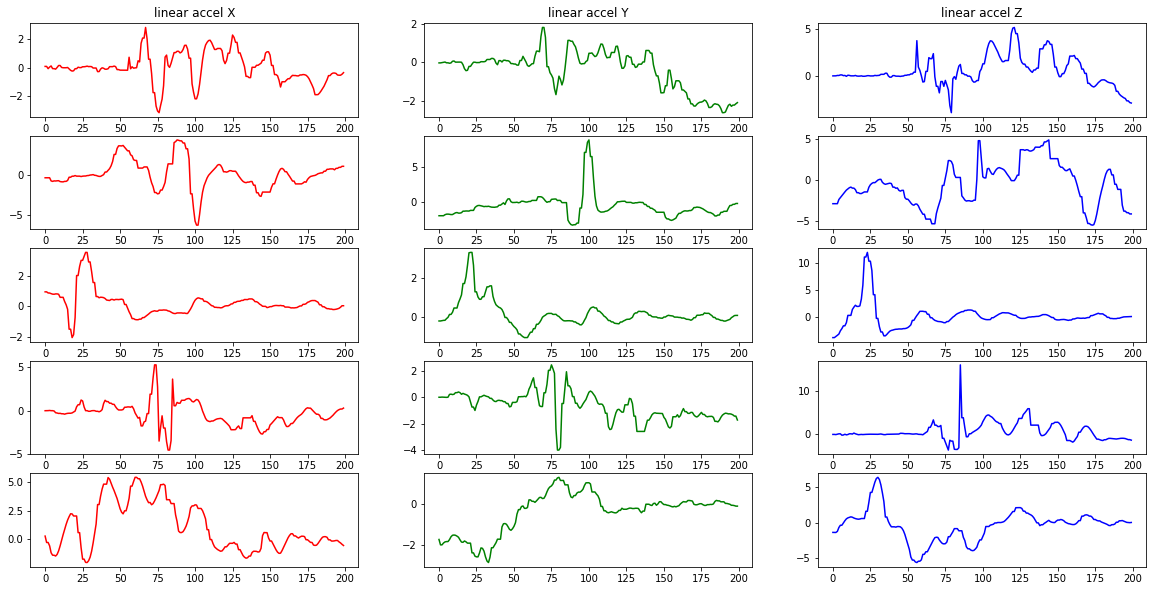

In [313]:
f = plt.figure(figsize=(20,10))

linear_accel_x_ax = f.add_subplot(5,3,1)
linear_accel_x_ax.plot(bring_device_positive_1["time"], bring_device_positive_1["linear_accel_x"], 'r')
plt.title('linear accel X')
linear_accel_y_ax = f.add_subplot(5,3,2)
linear_accel_y_ax.plot(bring_device_positive_1["time"], bring_device_positive_1["linear_accel_y"], 'g')
plt.title('linear accel Y')
linear_accel_z_ax = f.add_subplot(5,3,3)
linear_accel_z_ax.plot(bring_device_positive_1["time"], bring_device_positive_1["linear_accel_z"], 'b')
plt.title('linear accel Z')

linear_accel_x_ax = f.add_subplot(5,3,4)
linear_accel_x_ax.plot(bring_device_positive_2["time"], bring_device_positive_2["linear_accel_x"], 'r')
linear_accel_y_ax = f.add_subplot(5,3,5)
linear_accel_y_ax.plot(bring_device_positive_2["time"], bring_device_positive_2["linear_accel_y"], 'g')
linear_accel_z_ax = f.add_subplot(5,3,6)
linear_accel_z_ax.plot(bring_device_positive_2["time"], bring_device_positive_2["linear_accel_z"], 'b')

linear_accel_x_ax = f.add_subplot(5,3,7)
linear_accel_x_ax.plot(bring_device_positive_3["time"], bring_device_positive_3["linear_accel_x"], 'r')
linear_accel_y_ax = f.add_subplot(5,3,8)
linear_accel_y_ax.plot(bring_device_positive_3["time"], bring_device_positive_3["linear_accel_y"], 'g')
linear_accel_z_ax = f.add_subplot(5,3,9)
linear_accel_z_ax.plot(bring_device_positive_3["time"], bring_device_positive_3["linear_accel_z"], 'b')

linear_accel_x_ax = f.add_subplot(5,3,10)
linear_accel_x_ax.plot(bring_device_positive_4["time"], bring_device_positive_4["linear_accel_x"], 'r')
linear_accel_y_ax = f.add_subplot(5,3,11)
linear_accel_y_ax.plot(bring_device_positive_4["time"], bring_device_positive_4["linear_accel_y"], 'g')
linear_accel_z_ax = f.add_subplot(5,3,12)
linear_accel_z_ax.plot(bring_device_positive_4["time"], bring_device_positive_4["linear_accel_z"], 'b')

linear_accel_x_ax = f.add_subplot(5,3,13)
linear_accel_x_ax.plot(bring_device_positive_5["time"], bring_device_positive_5["linear_accel_x"], 'r')
linear_accel_y_ax = f.add_subplot(5,3,14)
linear_accel_y_ax.plot(bring_device_positive_5["time"], bring_device_positive_5["linear_accel_y"], 'g')
linear_accel_z_ax = f.add_subplot(5,3,15)
linear_accel_z_ax.plot(bring_device_positive_5["time"], bring_device_positive_5["linear_accel_z"], 'b')

In [314]:
# append bring-device negative samples

bring_device_negative_samples_list = []

for start_idx, end_idx in bring_device_non_gesture_list:
    # sample start and end indices
    sample_start_idx = start_idx
    sample_end_idx = start_idx + window_size
    
    while(sample_end_idx <= end_idx):
        # get samples within one window
        negative_samples = sensor_data.iloc[list(range(sample_start_idx, sample_end_idx))]
        negative_samples = negative_samples[acceleromter_features]
        
        bring_device_negative_samples_list.append(negative_samples)
        
        # concatenate multiple samples into one sample
        negative_sample_window = pd.DataFrame(negative_samples.values.reshape(1, -1))
        negative_sample_window["label"] = 0
        
        # append to dataframe
        sensor_data_chunks = sensor_data_chunks.append(negative_sample_window, ignore_index=True)
        
        # next sample
        sample_start_idx = sample_end_idx
        sample_end_idx = sample_start_idx + window_size

In [315]:
bring_device_neg_1 = bring_device_negative_samples_list[0]
bring_device_neg_2 = bring_device_negative_samples_list[1]
bring_device_neg_3 = bring_device_negative_samples_list[2]
bring_device_neg_4 = bring_device_negative_samples_list[3]
bring_device_neg_5 = bring_device_negative_samples_list[4]

In [316]:
bring_device_neg_1.reset_index(inplace=True)
bring_device_neg_2.reset_index(inplace=True)
bring_device_neg_3.reset_index(inplace=True)
bring_device_neg_4.reset_index(inplace=True)
bring_device_neg_5.reset_index(inplace=True)

In [317]:
bring_device_neg_1["time"] = bring_device_neg_1.index
bring_device_neg_2["time"] = bring_device_neg_2.index
bring_device_neg_3["time"] = bring_device_neg_3.index
bring_device_neg_4["time"] = bring_device_neg_4.index
bring_device_neg_5["time"] = bring_device_neg_5.index

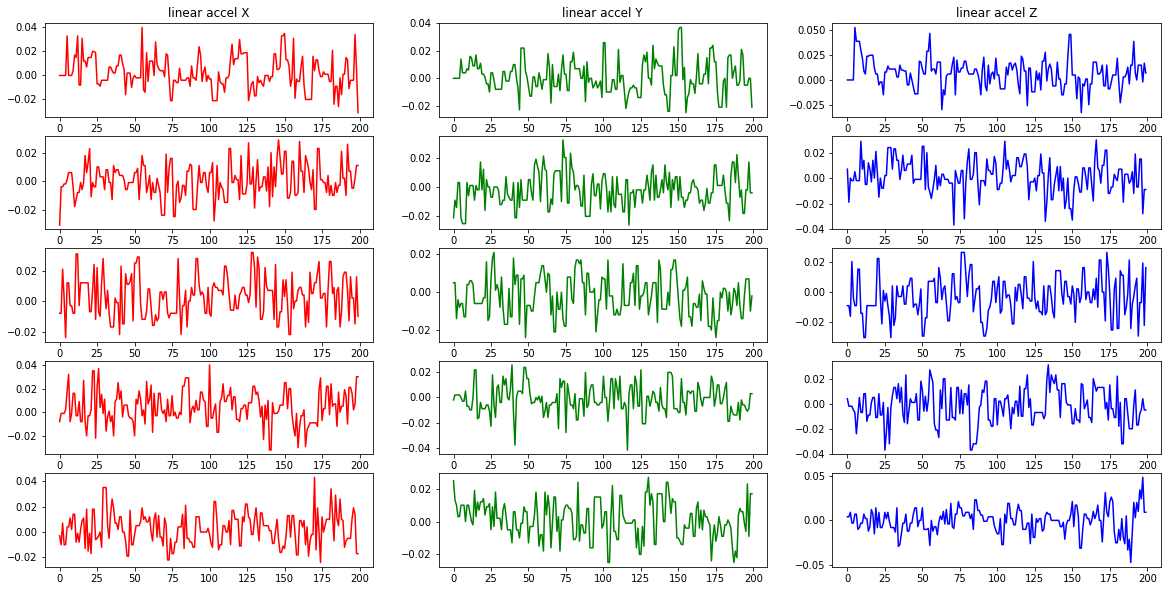

In [318]:
f = plt.figure(figsize=(20,10))

linear_accel_x_ax = f.add_subplot(5,3,1)
linear_accel_x_ax.plot(bring_device_neg_1["time"], bring_device_neg_1["linear_accel_x"], 'r')
plt.title('linear accel X')
linear_accel_y_ax = f.add_subplot(5,3,2)
linear_accel_y_ax.plot(bring_device_neg_1["time"], bring_device_neg_1["linear_accel_y"], 'g')
plt.title('linear accel Y')
linear_accel_z_ax = f.add_subplot(5,3,3)
linear_accel_z_ax.plot(bring_device_neg_1["time"], bring_device_neg_1["linear_accel_z"], 'b')
plt.title('linear accel Z')

linear_accel_x_ax = f.add_subplot(5,3,4)
linear_accel_x_ax.plot(bring_device_neg_2["time"], bring_device_neg_2["linear_accel_x"], 'r')
linear_accel_y_ax = f.add_subplot(5,3,5)
linear_accel_y_ax.plot(bring_device_neg_2["time"], bring_device_neg_2["linear_accel_y"], 'g')
linear_accel_z_ax = f.add_subplot(5,3,6)
linear_accel_z_ax.plot(bring_device_neg_2["time"], bring_device_neg_2["linear_accel_z"], 'b')

linear_accel_x_ax = f.add_subplot(5,3,7)
linear_accel_x_ax.plot(bring_device_neg_3["time"], bring_device_neg_3["linear_accel_x"], 'r')
linear_accel_y_ax = f.add_subplot(5,3,8)
linear_accel_y_ax.plot(bring_device_neg_3["time"], bring_device_neg_3["linear_accel_y"], 'g')
linear_accel_z_ax = f.add_subplot(5,3,9)
linear_accel_z_ax.plot(bring_device_neg_3["time"], bring_device_neg_3["linear_accel_z"], 'b')

linear_accel_x_ax = f.add_subplot(5,3,10)
linear_accel_x_ax.plot(bring_device_neg_4["time"], bring_device_neg_4["linear_accel_x"], 'r')
linear_accel_y_ax = f.add_subplot(5,3,11)
linear_accel_y_ax.plot(bring_device_neg_4["time"], bring_device_neg_4["linear_accel_y"], 'g')
linear_accel_z_ax = f.add_subplot(5,3,12)
linear_accel_z_ax.plot(bring_device_neg_4["time"], bring_device_neg_4["linear_accel_z"], 'b')

linear_accel_x_ax = f.add_subplot(5,3,13)
linear_accel_x_ax.plot(bring_device_neg_5["time"], bring_device_neg_5["linear_accel_x"], 'r')
linear_accel_y_ax = f.add_subplot(5,3,14)
linear_accel_y_ax.plot(bring_device_neg_5["time"], bring_device_neg_5["linear_accel_y"], 'g')
linear_accel_z_ax = f.add_subplot(5,3,15)
linear_accel_z_ax.plot(bring_device_neg_5["time"], bring_device_neg_5["linear_accel_z"], 'b')


In [319]:
sensor_data_chunks.head()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,label
0,0.087,-0.029,-0.014,0.087,-0.029,-0.014,-0.071,-0.015,-0.007,0.041,...,-0.533,-2.229,-2.685,-0.461,-2.160,-2.867,-0.352,-2.101,-2.917,1
1,-0.328,-1.954,-2.871,-0.328,-1.954,-2.871,-0.328,-1.954,-2.871,-0.328,...,0.970,-0.323,-3.967,1.102,-0.200,-4.120,1.102,-0.200,-4.120,1
2,0.970,-0.217,-3.717,0.970,-0.217,-3.717,0.896,-0.199,-3.513,0.892,...,-0.052,0.062,0.144,0.048,0.071,0.165,0.048,0.071,0.165,1
3,-0.019,0.013,-0.024,-0.019,0.013,-0.024,-0.009,0.025,-0.064,0.010,...,0.174,-1.426,-1.241,0.174,-1.426,-1.241,0.284,-1.724,-1.362,1
4,0.284,-1.724,-1.362,-0.272,-1.985,-1.372,-0.272,-1.985,-1.372,-0.564,...,-0.309,-0.087,0.025,-0.431,-0.112,-0.001,-0.534,-0.112,0.025,1


In [320]:
sensor_data_chunks.shape

(100, 601)

In [321]:
num_positive_samples = len(sensor_data_chunks[sensor_data_chunks["label"] == 1])

In [322]:
num_positive_samples

26

In [323]:
num_negative_samples = len(sensor_data_chunks[sensor_data_chunks["label"] == 0])

In [324]:
num_negative_samples

74

In [325]:
sensor_data_X = sensor_data_chunks[columns_X]
sensor_data_y = sensor_data_chunks[columns_y]

In [326]:
linear_accel_X = sensor_data_X.values
linear_accel_y = sensor_data_y["label"].values

In [327]:
linear_accel_y = linear_accel_y.astype("int")

In [344]:
linear_accel_y.dtype

dtype('int32')

In [328]:
X_train, X_test, y_train, y_test = train_test_split(linear_accel_X, linear_accel_y, test_size=0.3, stratify=linear_accel_y, random_state=0)

In [329]:
X_train.shape, y_train.shape

((70, 600), (70,))

In [330]:
X_test.shape, y_test.shape

((30, 600), (30,))

In [281]:
with open("sensor-data-3031-X.pkl", "wb") as fid:
    pickle.dump(linear_accel_X, fid)

with open("sensor-data-3031-y.pkl", "wb") as fid:
    pickle.dump(linear_accel_y, fid)

In [266]:
linear_accel_svm = svm.SVC(kernel="poly", degree=2, class_weight="balanced", random_state=42, verbose=True)

In [267]:
linear_accel_svm.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=True)

In [268]:
from sklearn.metrics import accuracy_score, f1_score

In [345]:
y_true = list(y_train)

In [346]:
y_pred = linear_accel_svm.predict(X_train)

In [351]:
y_pred.dtype

dtype('int32')

In [347]:
accuracy = accuracy_score(y_true, y_pred)

In [348]:
accuracy

0.91428571428571426

In [341]:
fl = f1_score(y_true, y_pred, average="weighted")

In [342]:
fl

0.908051948051948

In [275]:
linear_accel_svm.fit(linear_accel_X, linear_accel_y)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=True)

In [276]:
import pickle

In [277]:
# save the classifier
with open("accel-svm-model.pkl", "wb") as fid:
    pickle.dump(linear_accel_svm, fid)

# load it again
with open("accel-svm-model.pkl", "rb") as fid:
    linear_accel_svm_loaded = pickle.load(fid)

In [278]:
y_pred = linear_accel_svm_loaded.predict(X_test)

In [279]:
accuracy = accuracy_score(y_true, y_pred)

In [280]:
accuracy

1.0